In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

In [4]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
len(df), len(df.columns)

(3066766, 19)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [68]:
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [69]:
df["duration"] = df.duration.apply(lambda td: td.total_seconds()/60)

In [70]:
np.std(df.duration)

42.59434429744777

In [84]:
df_filtered = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
len(df_filtered)/len(df)

0.9812202822125979

In [93]:
cat_features = ["PULocationID", "DOLocationID"]
df_filtered[cat_features] = df_filtered[cat_features].astype(str)
dv = DictVectorizer()

C:\Users\User\AppData\Local\Temp\ipykernel_30900\2301498324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[cat_features] = df_filtered[cat_features].astype(str)


In [94]:
train_dict = df_filtered[cat_features].to_dict(orient="records")

In [95]:
X_train = dv.fit_transform(train_dict)

In [96]:
X_train.shape[1]

515

In [97]:
y_train = df_filtered.duration.values

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)

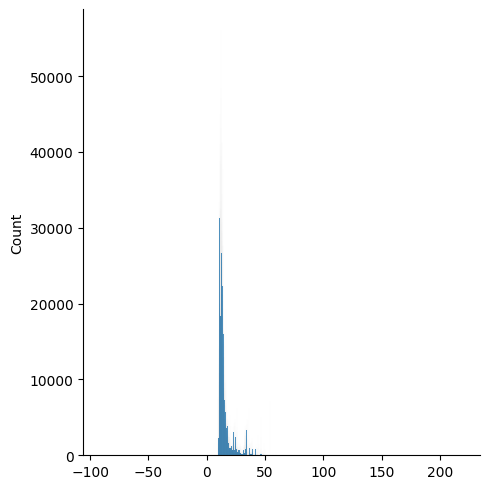

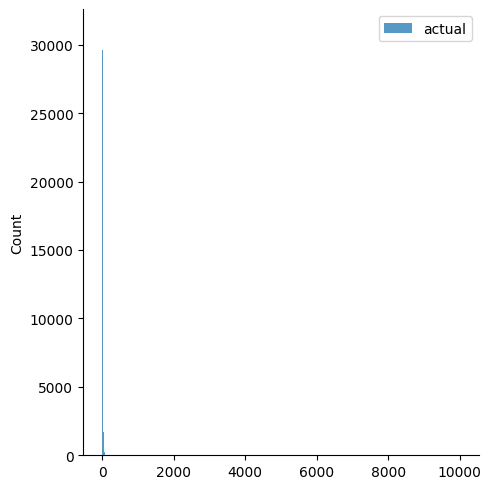

In [73]:
sns.displot(predictions, label="prediction")
sns.displot(y_train, label="actual")
plt.legend()

In [99]:
predictions[:10]

array([11.52732224, 10.89779656, 11.32573635, 27.91585369, 11.70325115,
       11.15633054, 11.31003886, 23.39856823, 10.97939849,  9.37237514])

In [100]:
type(predictions[0]), type(y_train[0])

(numpy.float64, numpy.float64)

In [101]:
y_train[:10]

array([ 8.43333333,  6.31666667, 12.75      ,  9.61666667, 10.83333333,
       12.3       , 10.45      , 22.73333333, 14.93333333, 10.9       ])

In [102]:
error = mean_squared_error(y_train, predictions, squared=False)
error

7.649261936284003

In [6]:
df_test = pd.read_parquet("yellow_tripdata_2023-02.parquet")
df_test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [104]:
df_test["duration"] = df_test["tpep_dropoff_datetime"] - df_test["tpep_pickup_datetime"]
df_test["duration"] = df_test.duration.apply(lambda td: td.total_seconds()/60)

In [113]:
df_test_filtered = df_test[(df_test['duration'] >= 1) & (df_test['duration'] <= 60)]
len(df_test_filtered)/len(df_test)

0.9800944077722545

In [114]:
y_test = df_test_filtered.duration.values

In [115]:
X_test = df_test_filtered[["PULocationID", "DOLocationID"]].astype(str)

In [116]:
test_dict = X_test.to_dict(orient="records")

In [117]:
X_test = dv.transform(test_dict)

In [118]:
test_pred = model.predict(X_test)
len(test_pred), len(y_test)

(2855951, 2855951)

In [111]:
X_test.shape[1], X_test.shape[0]

(515, 2913955)

In [119]:
mean_squared_error(y_test, test_pred, squared=False)

7.811818654341152